# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


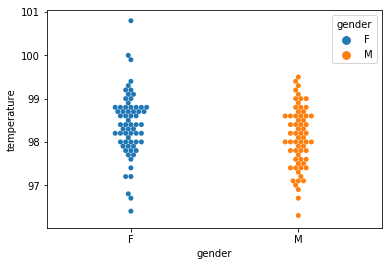

In [3]:
_ = sns.swarmplot(x='gender', y='temperature',hue='gender', data=df )
plt.xlabel('gender')
plt.show()

In [193]:
print(df.temperature.min())
print(df.temperature.max())
print((df.temperature.max() - df.temperature.min()) / 11)
print(df.temperature.mean())

96.3
100.8
0.4090909090909091
98.24923076923078


### Is the distribution of body temperatures normal?
The short answer is: yes, pretty much! There is a slight skew to the left but nothing that should preclude the data from being considered normally distributed. After some trial and error on the number of bins to use, I settled on 11 bins starting at 96.0$^{\circ}$F and increasing by 0.4$^{\circ}$F until about 100.0$^{\circ}$F. There is a plot with 12 bins as well for completeness and to verify that both plots show a normal distribution.

Here are some [some quick and dirty ways](https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/) to determine the bin width and how many bins to use. Essentially, the number of bins is roughly determined to be the square root of the number of records. There are 130 records and the square root of 130 is about 11. The site actually says to ***round up*** regardless of the size of the decimal. Below there are two plots. One with 11 bins and the other with 12. 

The bin width is determined by "dividing the \[...\] (Max - Min) value by the # of bins." (100.8 - 96.3) / 11 is approximately 0.4. The same bin width was used for both the 11 bins and 12 bins.



2018-12-18 17:31:29.523304
2018-12-18 17:31:29.645652


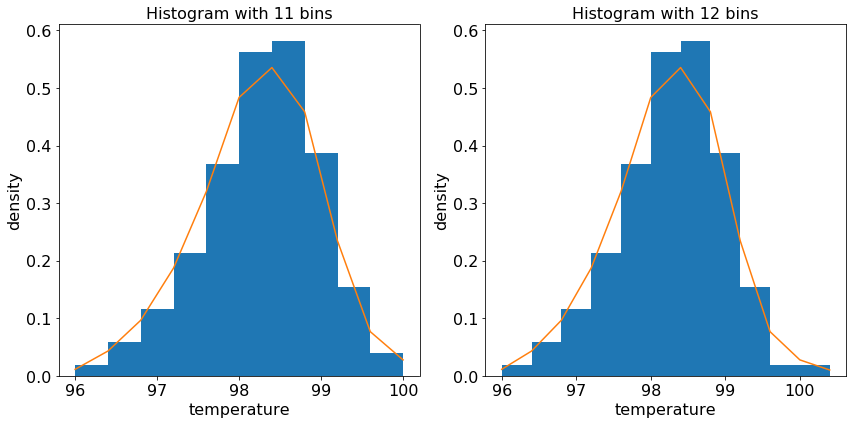

In [16]:
# Is the distribution of body temperatures normal?
print(dt.datetime.now())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

def mlist(start_n, increment, n):
    llist = []
    for i in range(n):
        llist.append(start_n + (increment*i))
    
    return llist

def hist_plots(dframe, b_edges, axx):
    density = stats.gaussian_kde(dframe.temperature)
    n_bins = len(b_edges)
    n, x, _ = axes[axx].hist(dframe.temperature, bins=b_edges, density=True)
    axes[axx].set_title("Histogram with " +str(n_bins)+ " bins", size=16)
    axes[axx].plot(x,density(x))
    axes[axx].set_xlabel('temperature')
    axes[axx].set_ylabel('density')
    axes[axx].xaxis.label.set_fontsize(16)
    axes[axx].yaxis.label.set_fontsize(16)
    axes[axx].tick_params(axis = 'x', which = 'major', labelsize = 16)
    axes[axx].tick_params(axis = 'y', which = 'major', labelsize = 16)
    plt.tight_layout()
    
    return 0

lbin = []
lbin.append(mlist(96.0,.4,11))
lbin.append(mlist(96.0,.4,12))

for i in range(len(lbin)):
    _ = hist_plots(df,lbin[i],i)
print(dt.datetime.now())